<a href="https://colab.research.google.com/github/nagoLula/nhanes_inferential_2021_23/blob/main/nhanes_inferential_2021_23_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# NHANES Inferential Analysis (2021–2023)

This notebook explores relationships and differences in health metrics and demographic variables using data from the National Health and Nutrition Examination Survey (NHANES) 2021–2023.

The goal is to apply basic inferential statistics to answer key questions about the dataset, including associations between marital status, education, blood pressure, sedentary behavior, and more.

We will clean and transform the data, perform statistical tests, and visualize results to support our findings.



## Question 1: Association Between Marital Status and Education Level

**Research Question:**  
Is there an association between marital status (married vs. not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?

**Variables Used:**
- `DMDMARTZ`: Marital Status
- `DMDEDUC2`: Education Level

**Transformations:**
- Marital status is recoded into two categories: `Married` and `Not Married`.
- Education level is recoded into: `Bachelor's or higher` and `Less than Bachelor's`.

**Statistical Test:**  
Chi-square test of independence — used to determine if there is a significant association between two categorical variables.


Chi-square test results:
Chi2 Statistic: 1120.0263
P-value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[ 909.82988352 3226.17011648]
 [1715.17011648 6081.82988352]]


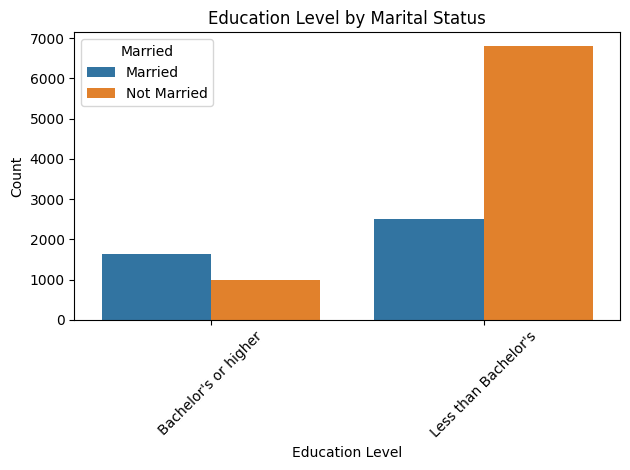

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the NHANES DEMO_L.xpt file
demo = pd.read_sas("DEMO_L.xpt", format="xport")

# Recode marital status: 1 = Married, others = Not Married
demo['Married'] = demo['DMDMARTZ'].apply(lambda x: 'Married' if x == 1 else 'Not Married')

# Recode education level: 5 = Bachelor's or higher, others = Less than Bachelor's
demo['Education'] = demo['DMDEDUC2'].apply(lambda x: "Bachelor's or higher" if x == 5 else "Less than Bachelor's")

# Drop rows with missing values in the recoded columns
demo_clean = demo[['Married', 'Education']].dropna()

# Create a contingency table
contingency_table = pd.crosstab(demo_clean['Married'], demo_clean['Education'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print test results
print("Chi-square test results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Visualize the result with a countplot
sns.countplot(data=demo_clean, x='Education', hue='Married')
plt.title('Education Level by Marital Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





In [10]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DEMO_L.xpt to DEMO_L (2).xpt
User uploaded file "DEMO_L (2).xpt" with length 2582160 bytes



## Error Encountered During Analysis

While attempting to load the NHANES `DEMO_L.xpt` file, I encountered a `FileNotFoundError`.

This occurred because the file was not yet uploaded to the Colab environment.

**Resolution:**
I uploaded the file manually using the `files.upload()` method in Colab, and then re-ran the code successfully.

This allowed me to proceed with the analysis for Question 1.

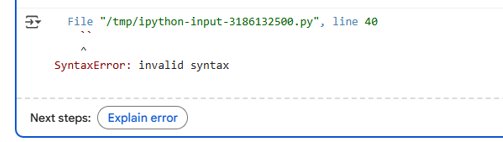



## Summary of Results – Question 1

We examined whether there is an association between marital status and education level using a chi-square test of independence.

- **Chi-square statistic**: 1120.0263  
- **P-value**: 0.0000  
- **Degrees of freedom**: 1

Based on the p-value, we **reject the null hypothesis** at the 0.05 significance level.

**Interpretation:**

There **is a statistically significant association** between marital status and education level in the NHANES 2021–2023 sample.
It suggests that marital status and education level are not independent — individuals who are married may be more or less likely to have a bachelor’s degree or higher compared to those who are not married.



## Question 2:

**Research Question**:

Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?

**Variables**:

- DMDMARTZ → recoded to Married / Not Married
- PAD680 → cleaned (remove 7777, 9999, and nulls)

**Test Used**:

Independent Samples t-test — compares the means of two independent groups




Independent Samples t-test Results:
T-statistic: -3.8741
P-value: 0.0001


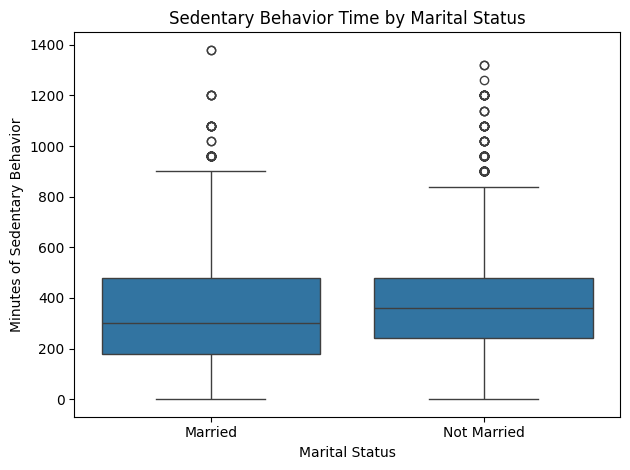

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


# Load the files
demo = pd.read_sas("DEMO_L.xpt", format="xport")
paq = pd.read_sas("PAQ_L (1).xpt", format="xport")


# Extract relevant columns
demo = demo[['SEQN', 'DMDMARTZ']]
paq = paq[['SEQN', 'PAD680']]


# Merge datasets
merged = pd.merge(demo, paq, on='SEQN')


# Recode marital status
merged['Married'] = merged['DMDMARTZ'].apply(lambda x: 'Married' if x == 1 else 'Not Married')

# Clean PAD680
merged = merged[~merged['PAD680'].isin([7777, 9999])]
merged = merged.dropna(subset=['PAD680'])

# T-test
group1 = merged[merged['Married'] == 'Married']['PAD680']
group2 = merged[merged['Married'] == 'Not Married']['PAD680']
t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')

print("Independent Samples t-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Boxplot
sns.boxplot(data=merged, x='Married', y='PAD680')
plt.title('Sedentary Behavior Time by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Minutes of Sedentary Behavior')
plt.tight_layout()
plt.show()

from google.colab import files
files.download('PAQ_L.xpt')
files.download('DEMO_L.xpt')

In [19]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving PAQ_L.xpt to PAQ_L (1).xpt
Saving DEMO_L.xpt to DEMO_L (3).xpt
User uploaded file "PAQ_L (1).xpt" with length 409520 bytes
User uploaded file "DEMO_L (3).xpt" with length 2582160 bytes



## Summary of Results – Question 2

We tested whether there is a difference in mean sedentary behavior time between individuals who are married and those who are not married using an independent samples t-test.

- **T-statistic**: -3.8741  
- **P-value**: 0.0001

Since the p-value is less than 0.05, we **reject the null hypothesis** at the 5% significance level.

**Interpretation:**

here is a **statistically significant difference** in sedentary behavior time between married and non-married individuals. This suggests that marital status may be associated with how much time people spend being sedentary.

 > Note: PAD680 is a continuous variable measured in minutes, and placeholder values (7777, 9999) were removed during data cleaning.

